In [1]:
featured_model = 'MEL_dB_Highres'

In [2]:
from DataLoad import load_to_dataframe
df, df_raw, class_dict = load_to_dataframe()

In [3]:
from feature_generator import create_features
features, labels = create_features(df_raw, featured_model + ".txt")

Create MEL Bins with dB loudness values
Hop_length:  1024
Sampling Rate: 44100
Fast Fourier Window: 1024
Number of MEL Bins: 128
Shape of Feature:  [128, 130, 1]
Minimum Frequency:  0.0
Maximum Frequency:  11025.0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.3)

In [15]:
from BatchGenerators import SoundSequence
batch_size = 30
train_gen = SoundSequence(X_train, y_train, batch_size)
test_gen = SoundSequence(X_test, y_test, batch_size)

In [7]:
features.shape

(6705, 128, 130, 1)

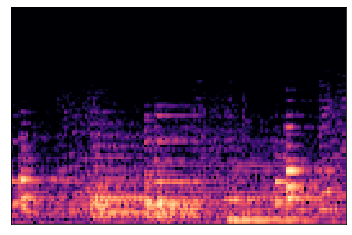

In [10]:
import librosa.display
import numpy as np
mel = features[7].squeeze()
mel_db = librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(mel)

In [41]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, SpatialDropout2D

model = models.Sequential()

#model.add(layers.Conv1D(1, kernel_size = 200, input_shape=(13299,1))) #
model.add(layers.Conv2D(32,(3,3), activation="relu", input_shape=(X_train.shape[1:])))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(256, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.SpatialDropout2D(0.25))
#model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(11, activation="softmax"))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 127, 129, 32)      160       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 63, 64, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 62, 63, 64)        8256      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
spatial_dropout2d_2 (Spatial (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 30, 30, 128)       32896     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 128)      

In [42]:
optimizer = 'adam'
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [43]:
epochs = 20
history = model.fit(
    train_gen,
    steps_per_epoch=30,
    epochs=epochs,
    validation_data=test_gen,
    validation_steps=30
    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30 steps, validate for 30 steps
Epoch 1/20
30/30 [==============================] - 9s 291ms/step - loss: 12.5638 - accuracy: 0.1078 - val_loss: 2.3753 - val_accuracy: 0.1278
Epoch 2/20
30/30 [==============================] - 8s 283ms/step - loss: 2.3704 - accuracy: 0.1189 - val_loss: 2.3584 - val_accuracy: 0.1400
Epoch 3/20
30/30 [==============================] - 8s 279ms/step - loss: 2.3225 - accuracy: 0.1500 - val_loss: 2.3271 - val_accuracy: 0.1367
Epoch 4/20
30/30 [==============================] - 8s 272ms/step - loss: 2.3021 - accuracy: 0.1533 - val_loss: 2.2874 - val_accuracy: 0.1600
Epoch 5/20
30/30 [==============================] - 8s 275ms/step - loss: 2.2789 - accuracy: 0.1756 - val_loss: 2.2761 - val_accuracy: 0.2056
Epoch 6/20
30/30 [==============================] - 8s 278ms/step - loss: 2.2286 - accuracy: 0.1933 - val_loss: 2.2294 - val_accuracy: 0.2511
Epoch 7/20
30/30 [==============================] - 9s 

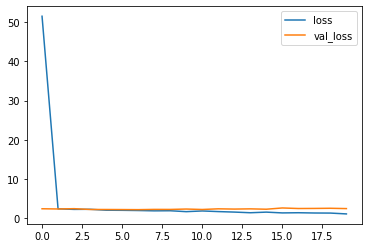

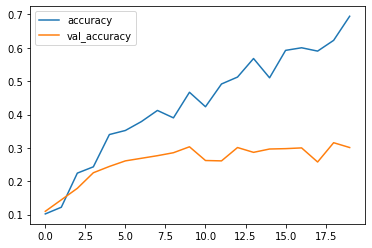

In [40]:
from PlotModel import plot_model_history
plot_model_history(model)

# model.save('saved_models/' + featured_model + ".mdl") 